# Cargamos las librerias


In [4]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML


# Descargamos el archivo, en este caso csv

In [5]:
df= pd.read_csv('/Users/juliafenton/Desktop/Kris/dataset-fin de curso/bank-additional_bank-additional-full.csv')

In [6]:
df.shape

(41188, 1)

In [7]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


# Vemos que hay una unica columna, nos disponemos a separtala
Para separar la única columna en múltiples columnas utilizando el separador adecuado (punto y coma en este caso), puedes seguir estos pasos:
Utiliza el método str.split() con el separador ';' y la opción expand=True:

In [8]:
df = df['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'].str.split(';', expand=True)


# Asigna nombres a las nuevas columnas:


In [9]:
df.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


# Convierte los tipos de datos de las columnas según sea necesario:


In [10]:
df['age'] = pd.to_numeric(df['age'])
df['duration'] = pd.to_numeric(df['duration'])
df['campaign'] = pd.to_numeric(df['campaign'])
df['pdays'] = pd.to_numeric(df['pdays'])
df['previous'] = pd.to_numeric(df['previous'])
df['emp.var.rate'] = pd.to_numeric(df['emp.var.rate'])
df['cons.price.idx'] = pd.to_numeric(df['cons.price.idx'])
df['cons.conf.idx'] = pd.to_numeric(df['cons.conf.idx'])
df['euribor3m'] = pd.to_numeric(df['euribor3m'])
df['nr.employed'] = pd.to_numeric(df['nr.employed'])


# √isualizamos las columnas en español


| Original | Traducción al Español |
|---|---|
| age | edad |
| job | trabajo |
| marital | estado civil |
| education | educación |
| default | impago |
| housing | vivienda |
| loan | préstamo |
| contact | contacto |
| month | mes |
| day_of_week | día de la semana |
| duration | duración |
| campaign | campaña |
| pdays | días transcurridos |
| previous | anterior |
| poutcome | resultado anterior |
| emp.var.rate | tasa de variación de empleo |
| cons.price.idx | índice de precios al consumidor |
| cons.conf.idx | índice de confianza del consumidor |
| euribor3m | euribor a 3 meses |
| nr.employed | número de empleados |
| y | resultado (variable objetivo) |

| Columna          | Descripción                                                                                   |
|-------------------|----------------------------------------------------------------------------------------------|
| edad              | edad (numérico)                                                                              |
| trabajo           | tipo de trabajo (categórico)                                                                 |
| estado civil      | estado civil (categórico)                                                                    |
| educación         | educación (categórico)                                                                        |
| default           | ¿tiene crédito en incumplimiento? (categórico)                                               |
| vivienda          | ¿tiene préstamo de vivienda? (categórico)                                                    |
| préstamo          | ¿tiene préstamo personal? (categórico)                                                       |
| contacto          | tipo de comunicación de contacto (categórico)                                               |
| mes               | último mes de contacto del año (categórico)                                                  |
| día_de_la_semana  | último día de contacto de la semana (categórico)                                            |
| duración          | duración del último contacto, en segundos (numérico)                                         |
| campaña           | número de contactos realizados durante esta campaña y para este cliente (numérico)           |
| pdays             | número de días que han pasado desde que se contactó al cliente por última vez en una campaña anterior (numérico) |
| anterior          | número de contactos realizados antes de esta campaña y para este cliente (numérico)          |
| resultado         | resultado de la campaña de marketing anterior (categórico)                                   |
| tasa_var_emp      | tasa de variación de empleo - indicador trimestral (numérico)                                |
| índice_precios    | índice de precios al consumidor - indicador mensual (numérico)                               |
| índice_confianza   | índice de confianza del consumidor - indicador mensual (numérico)                            |
| euribor3m        | tasa de euribor a 3 meses - indicador diario (numérico)                                     |
| empleados         | número de empleados - indicador trimestral (numérico)                                        |
| y                 | ¿ha suscrito el cliente un depósito a plazo? (binario)                                      |

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [12]:

# Función para mostrar separadores
def show_separator():
    display(HTML("<hr style='border: 2px solid #ddd;'>"))

# Información general del DataFrame
print("Información general del DataFrame:")
display(df.info())
show_separator()

# Resumen estadístico de las variables numéricas
print("Resumen estadístico de las variables numéricas:")
display(df.describe())
show_separator()

# Verificar valores únicos en columnas categóricas
print("Valores únicos en columnas categóricas:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos en {col}:")
    display(df[col].value_counts())
show_separator()

# Comprobar valores nulos o faltantes
print("Valores nulos o faltantes:")
display(df.isnull().sum())
show_separator()

# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")
show_separator()

# Revisar rangos de variables numéricas
print("Rangos de variables numéricas:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\n{col}:")
    print(f"Mínimo: {df[col].min()}, Máximo: {df[col].max()}")
show_separator()

# Verificar la consistencia de fechas (si aplica)
if 'date' in df.columns:
    print("Rango de fechas:")
    print(f"Desde: {df['date'].min()}, Hasta: {df['date'].max()}")
    show_separator()

# Comprobar la distribución de la variable objetivo
print("Distribución de la variable objetivo 'y':")
display(df['y'].value_counts(normalize=True))


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 

None

Resumen estadístico de las variables numéricas:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Valores únicos en columnas categóricas:

Valores únicos en job:


job
"admin."           10422
"blue-collar"       9254
"technician"        6743
"services"          3969
"management"        2924
"retired"           1720
"entrepreneur"      1456
"self-employed"     1421
"housemaid"         1060
"unemployed"        1014
"student"            875
"unknown"            330
Name: count, dtype: int64


Valores únicos en marital:


marital
"married"     24928
"single"      11568
"divorced"     4612
"unknown"        80
Name: count, dtype: int64


Valores únicos en education:


education
"university.degree"      12168
"high.school"             9515
"basic.9y"                6045
"professional.course"     5243
"basic.4y"                4176
"basic.6y"                2292
"unknown"                 1731
"illiterate"                18
Name: count, dtype: int64


Valores únicos en default:


default
"no"         32588
"unknown"     8597
"yes"            3
Name: count, dtype: int64


Valores únicos en housing:


housing
"yes"        21576
"no"         18622
"unknown"      990
Name: count, dtype: int64


Valores únicos en loan:


loan
"no"         33950
"yes"         6248
"unknown"      990
Name: count, dtype: int64


Valores únicos en contact:


contact
"cellular"     26144
"telephone"    15044
Name: count, dtype: int64


Valores únicos en month:


month
"may"    13769
"jul"     7174
"aug"     6178
"jun"     5318
"nov"     4101
"apr"     2632
"oct"      718
"sep"      570
"mar"      546
"dec"      182
Name: count, dtype: int64


Valores únicos en day_of_week:


day_of_week
"thu"    8623
"mon"    8514
"wed"    8134
"tue"    8090
"fri"    7827
Name: count, dtype: int64


Valores únicos en poutcome:


poutcome
"nonexistent"    35563
"failure"         4252
"success"         1373
Name: count, dtype: int64


Valores únicos en y:


y
"no"     36548
"yes"     4640
Name: count, dtype: int64

Valores nulos o faltantes:


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Número de filas duplicadas: 12


Rangos de variables numéricas:

age:
Mínimo: 17, Máximo: 98

duration:
Mínimo: 0, Máximo: 4918

campaign:
Mínimo: 1, Máximo: 56

pdays:
Mínimo: 0, Máximo: 999

previous:
Mínimo: 0, Máximo: 7

emp.var.rate:
Mínimo: -3.4, Máximo: 1.4

cons.price.idx:
Mínimo: 92.201, Máximo: 94.767

cons.conf.idx:
Mínimo: -50.8, Máximo: -26.9

euribor3m:
Mínimo: 0.634, Máximo: 5.045

nr.employed:
Mínimo: 4963.6, Máximo: 5228.1


Distribución de la variable objetivo 'y':


y
"no"     0.887346
"yes"    0.112654
Name: proportion, dtype: float64

# Resumen del DataFrame

## Información general del DataFrame
- **Total de entradas (filas):** 41,188
- **Total de columnas:** 21
- **Tipos de datos de las columnas:** `int64`, `object`, `float64`
- **Valores no nulos:** Todas las columnas tienen 41,188 valores no nulos (sin valores faltantes).

## Resumen estadístico de variables numéricas
- Se muestran estadísticas descriptivas (conteo, media, desviación estándar, mínimo, máximo, cuartiles) para las variables numéricas.
- **Ejemplo:** La edad media es de 40 años, con un mínimo de 17 y un máximo de 98.

## Valores únicos en columnas categóricas
- Se presenta la distribución de valores para cada variable categórica.
- **Ejemplo:** En la columna "job", "admin." es la categoría más común con 10,422 ocurrencias.

## Valores nulos
- No se encontraron valores nulos en ninguna columna.

## Filas duplicadas
- Se encontraron 12 filas duplicadas en el DataFrame.

## Rangos de variables numéricas
- Se muestran los valores mínimos y máximos para cada variable numérica.
- **Ejemplo:** "duration" va de 0 a 4,918 segundos.

## Distribución de la variable objetivo 'y'
- Aproximadamente el 88.73% de las instancias son "no" y el 11.27% son "yes".

---

Esta información es crucial para entender la estructura y características de los datos, lo que ayudará en el análisis posterior y en la toma de decisiones para el modelado.

# Análisis de Datos Duplicados en el DataFrame

## Resumen General
El análisis revela la presencia de 12 pares de filas duplicadas en el conjunto de datos, lo que representa un total de 24 filas con información repetida. Estas duplicaciones abarcan diversos perfiles demográficos y características de campaña.

## Características de las Filas Duplicadas

### Distribución Demográfica
- **Edad:** Rango de 24 a 71 años
- **Ocupaciones:** Variadas, incluyendo servicios, técnicos, administrativos, obreros y jubilados
- **Estado Civil:** Solteros, casados y divorciados
- **Educación:** Desde educación básica hasta títulos universitarios

### Detalles de la Campaña
- **Contacto:** Mezcla de contactos por teléfono celular y fijo
- **Temporalidad:** Ocurren en diferentes meses (abril, mayo, julio, agosto, octubre, noviembre)
- **Resultado:** Mayoría con resultado "no", con un par de casos "yes"

### Características Económicas
- **Empleo:** Tasas de variación de empleo desde -3.4 hasta 1.4
- **Índices Económicos:** Variaciones en índices de precios al consumidor y confianza del consumidor

## Implicaciones para el Análisis
- **Calidad de Datos:** La presencia de duplicados sugiere posibles errores en la recopilación o importación de datos.
- **Impacto en el Análisis:**
  - Puede llevar a una sobrerrepresentación de ciertos perfiles.
  - Potencial sesgo en modelos predictivos si no se manejan adecuadamente.

## Consideraciones para la Limpieza
- Necesidad de evaluar si los duplicados son errores genuinos o datos válidos repetidos.
- Importancia de documentar y justificar cualquier decisión de eliminación o retención de duplicados.

## Recomendaciones
- **Investigación de Origen:** Determinar la fuente de las duplicaciones para prevenir futuros errores.
- **Estrategia de Limpieza:**
  - Considerar la eliminación de duplicados, manteniendo una copia de cada par.
  - Documentar meticulosamente el proceso de limpieza.
- **Análisis de Sensibilidad:** Evaluar el impacto de los duplicados en los resultados del análisis.
- **Mejora de Procesos:** Implementar controles de calidad en la recopilación y procesamiento de datos para evitar futuras duplicaciones.

In [13]:
# 1. Identificar y contar duplicados
duplicados = df[df.duplicated(keep=False)]
num_duplicados = len(duplicados)

print(f"Número de filas duplicadas: {num_duplicados}")

# 2. Guardar los duplicados en un archivo separado para referencia
duplicados.to_csv('duplicados.csv', index=False)

# 3. Eliminar duplicados, manteniendo la primera ocurrencia
df_limpio = df.drop_duplicates(keep='first')

# 4. Verificar la eliminación
filas_eliminadas = len(df) - len(df_limpio)
print(f"Filas eliminadas: {filas_eliminadas}")

# 5. Reiniciar el índice del DataFrame limpio
df_limpio = df_limpio.reset_index(drop=True)

# 6. Documentar el proceso
with open('informe_limpieza.txt', 'w') as f:
    f.write(f"Informe de limpieza de duplicados\n")
    f.write(f"Fecha: {pd.Timestamp.now()}\n\n")
    f.write(f"Filas originales: {len(df)}\n")
    f.write(f"Filas duplicadas encontradas: {num_duplicados}\n")
    f.write(f"Filas eliminadas: {filas_eliminadas}\n")
    f.write(f"Filas después de la limpieza: {len(df_limpio)}\n")

# 7. Guardar el DataFrame limpio
df_limpio.to_csv('datos_limpios.csv', index=False)

print("Proceso de limpieza completado. Revise 'informe_limpieza.txt' para más detalles.")


Número de filas duplicadas: 24
Filas eliminadas: 12
Proceso de limpieza completado. Revise 'informe_limpieza.txt' para más detalles.


In [14]:
print(f"Número de filas duplicadas: {df_limpio.duplicated().sum()}")

Número de filas duplicadas: 0


# Análisis del DataFrame

## Variables numéricas
- **age:** Rango de 17 a 98 años
- **duration:** Rango de 0 a 4,918 segundos
- **campaign:** Rango de 1 a 56 contactos
- **pdays:** Rango de 0 a 999 días
- **previous:** Rango de 0 a 7 contactos previos
- **emp.var.rate:** Rango de -3.4 a 1.4
- **cons.price.idx:** Rango de 92.201 a 94.767
- **cons.conf.idx:** Rango de -50.8 a -26.9
- **euribor3m:** Rango de 0.634 a 5.045
- **nr.employed:** Rango de 4963.6 a 5228.1

## Variables categóricas
- **job:** Tipos de trabajo (admin., blue-collar, technician, etc.)
- **marital:** Estado civil (married, single, divorced, unknown)
- **education:** Nivel educativo (basic.4y, basic.6y, basic.9y, high.school, university.degree, etc.)
- **default:** Si tiene crédito en incumplimiento (yes, no, unknown)
- **housing:** Si tiene préstamo de vivienda (yes, no, unknown)
- **loan:** Si tiene préstamo personal (yes, no, unknown)
- **contact:** Tipo de contacto (cellular, telephone)
- **month:** Mes del último contacto (may, jul, aug, jun, nov, apr, oct, sep, mar, dec)
- **day_of_week:** Día de la semana del último contacto (mon, tue, wed, thu, fri)
- **poutcome:** Resultado de la campaña anterior (nonexistent, failure, success)
- **y:** Variable objetivo (yes, no)

## Análisis de valores faltantes
- No se detectaron valores faltantes en ninguna columna.

## Duplicados
- Se identificaron 12 pares de filas duplicadas (24 filas en total).

## Distribución de la variable objetivo
- **"no":** 88.73%
- **"yes":** 11.27%

## Correlaciones entre variables numéricas
- Calcular la matriz de correlación para identificar relaciones significativas.

## Análisis de variables categóricas
- Realizar gráficos de barras para visualizar la distribución de cada variable categórica.

## Análisis temporal
- Examinar la distribución de contactos por mes y día de la semana.

## Análisis de campañas
- Estudiar la relación entre la duración de la llamada, el número de contactos y el resultado de la campaña.

In [15]:
# 1. Verificar y manejar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 2. Convertir tipos de datos
df['age'] = df['age'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)
df['y'] = df['y'].astype('category')

# 3. Normalizar valores categóricos
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.replace('"', '')

# 4. Crear variables dummy para características categóricas
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week'])

# 5. Normalizar variables numéricas
def normalize(X):
    return (X - X.mean()) / X.std()

numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df_encoded[numeric_columns] = df_encoded[numeric_columns].apply(normalize)

# 6. Manejar valores atípicos (ejemplo para 'age')
Q1 = df_encoded['age'].quantile(0.25)
Q3 = df_encoded['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_encoded = df_encoded[(df_encoded['age'] >= lower_bound) & (df_encoded['age'] <= upper_bound)]

# 7. Crear nuevas características
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# 8. Reorganizar columnas
columns_order = ['age', 'age_group'] + [col for col in df_encoded.columns if col not in ['age', 'age_group', 'y']] + ['y']
df_encoded = df_encoded[columns_order]

# Guardar el DataFrame procesado
df_encoded.to_csv('datos_procesados.csv', index=False)

print("Procesamiento de datos completado. Revise 'datos_procesados.csv' para el resultado final.")


Valores nulos por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Procesamiento de datos completado. Revise 'datos_procesados.csv' para el resultado final.


# Análisis de Valores Nulos

## Recuento de Valores Nulos
- Se muestra un recuento de valores nulos para cada columna del DataFrame.
- Todas las columnas (21 en total) presentan 0 valores nulos.
- Esto indica que el conjunto de datos está completo, sin valores faltantes en ninguna de las variables.

## Tipos de Datos
- La columna 'dtype' al final muestra que el recuento se realizó utilizando el tipo de datos `int64`, lo cual es apropiado para contar valores nulos.

## Variables Analizadas
El análisis incluye una amplia gama de variables, abarcando:
- **Datos demográficos:** age, job, marital, education
- **Variables financieras:** default, housing, loan
- **Detalles de contacto:** contact, month, day_of_week
- **Información de campaña:** duration, campaign, pdays, previous, poutcome
- **Indicadores económicos:** emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
- **Variable objetivo:** 'y'

## Confirmación de Procesamiento
- El mensaje "Procesamiento de datos completado" indica que se han realizado operaciones adicionales en el DataFrame.
- Se menciona la creación de un archivo 'datos_procesados.csv', sugiriendo que los datos procesados han sido guardados para su posterior uso o análisis.

## Conclusión
Esta salida demuestra una etapa crucial en el preprocesamiento de datos, confirmando la integridad del conjunto de datos y la ausencia de valores faltantes, lo cual es fundamental para garantizar la calidad y fiabilidad de los análisis subsiguientes.

In [16]:


# Cargar los datos
df = pd.read_csv('datos_procesados.csv')

# 1. Entendimiento de datos de clientes, detalles de las campañas y sus resultados
print(df.info())
print(df.describe())
# 2. Estadísticas descriptivas
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40719 entries, 0 to 40718
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            40719 non-null  float64
 1   age_group                      16951 non-null  object 
 2   duration                       40719 non-null  float64
 3   campaign                       40719 non-null  float64
 4   pdays                          40719 non-null  float64
 5   previous                       40719 non-null  float64
 6   poutcome                       40719 non-null  object 
 7   emp.var.rate                   40719 non-null  float64
 8   cons.price.idx                 40719 non-null  float64
 9   cons.conf.idx                  40719 non-null  float64
 10  euribor3m                      40719 non-null  float64
 11  nr.employed                    40719 non-null  float64
 12  job_admin.                     40719 non-null 

In [17]:
# Lista de columnas que deseas extraer
columnas_deseadas = [
    'job_admin.',
    'job_blue-collar',
    'job_entrepreneur',
    'job_housemaid',
    'job_management',
    'job_retired',
    'job_self-employed',
    'job_services'
]

# Crear un nuevo DataFrame con solo las columnas deseadas
nuevo_df = df[columnas_deseadas]

# Mostrar el nuevo DataFrame
nuevo_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services
0,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
40714,True,False,False,False,False,False,False,False
40715,False,False,False,False,False,False,False,False
40716,False,True,False,False,False,False,False,False
40717,False,False,False,False,False,True,False,False


In [18]:


# Cargar el dataset (ajusta la ruta del archivo según sea necesario)
data_path = 'bank-additional_bank-additional-full.csv'
df = pd.read_csv(data_path, sep=';')

# Mostrar las primeras filas para inspección general
print("Vista previa del DataFrame:")
print(df.head())

# Verificar los nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns.tolist())

# Confirmar la existencia de 'month' y 'day_of_week'
required_columns = ['month', 'day_of_week']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"\nColumnas faltantes: {missing_columns}")
else:
    print("\nTodas las columnas requeridas están presentes.")


Vista previa del DataFrame:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf

In [19]:
# Revisar valores únicos en 'month' y 'day_of_week'
if 'month' in df.columns:
    print("\nValores únicos en 'month':")
    print(df['month'].unique())

if 'day_of_week' in df.columns:
    print("\nValores únicos en 'day_of_week':")
    print(df['day_of_week'].unique())

# Opcional: Corregir inconsistencias (ejemplo genérico)
# Suponiendo que 'month' y 'day_of_week' tienen valores con espacios o errores tipográficos
if 'month' in df.columns:
    df['month'] = df['month'].str.strip().str.lower()

if 'day_of_week' in df.columns:
    df['day_of_week'] = df['day_of_week'].str.strip().str.lower()



Valores únicos en 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Valores únicos en 'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


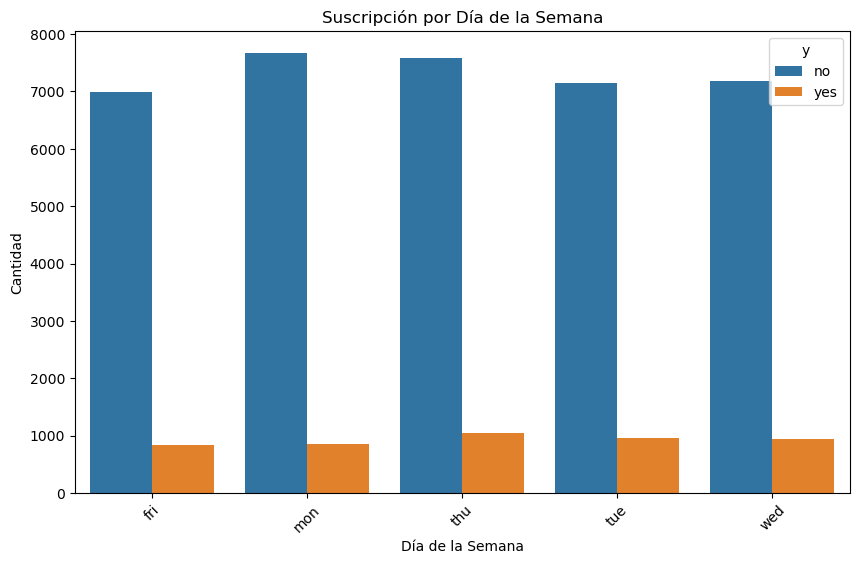

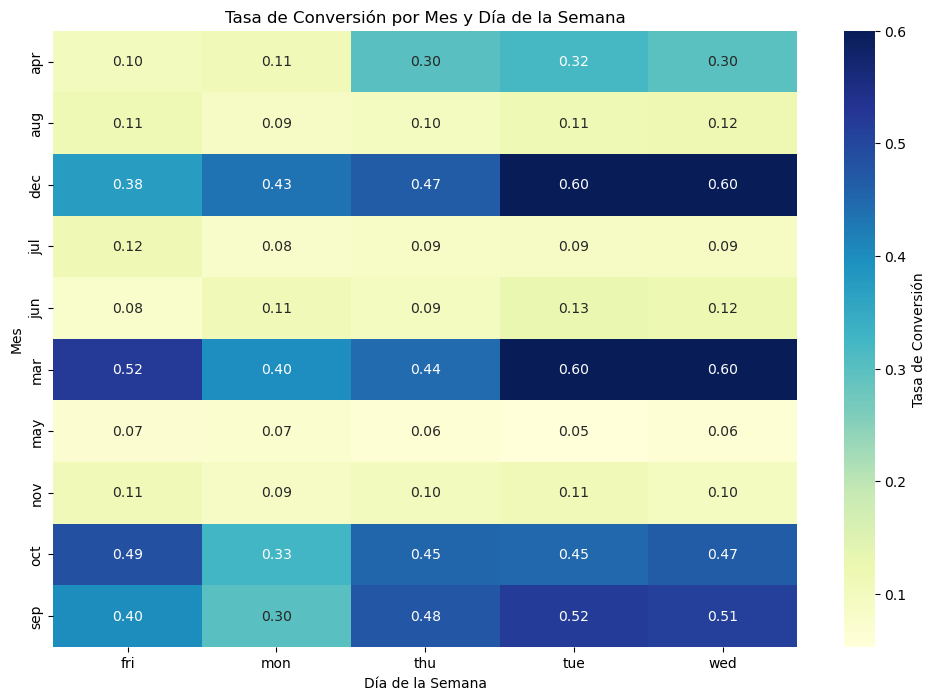

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de la distribución por día de la semana
if 'day_of_week' in df.columns and 'y' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='day_of_week', hue='y', data=df, order=sorted(df['day_of_week'].unique()))
    plt.title('Suscripción por Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNo se pudo generar el gráfico: columnas necesarias no disponibles.")

# Gráfico de tasa de conversión por mes y día de la semana
if 'month' in df.columns and 'day_of_week' in df.columns and 'y' in df.columns:
    # Crear una columna de conversión binaria
    df['conversion'] = (df['y'] == 'yes').astype(int)
    
    # Calcular tasas de conversión
    conversion_rates = df.groupby(['month', 'day_of_week'])['conversion'].mean().unstack()

    # Crear heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(conversion_rates, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Tasa de Conversión'})
    plt.title('Tasa de Conversión por Mes y Día de la Semana')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Mes')
    plt.show()
else:
    print("\nNo se pudo generar el heatmap: columnas necesarias no disponibles.")


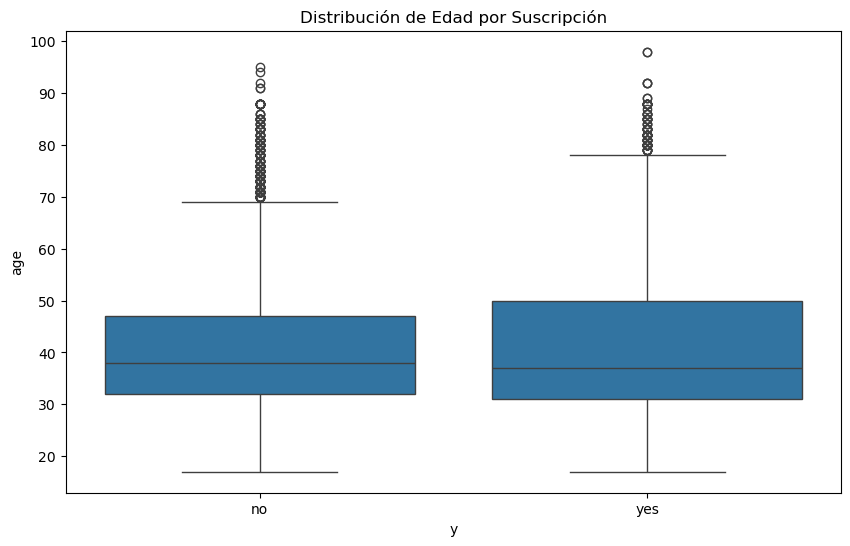

In [21]:


# 3. Análisis de la relación entre características demográficas y suscripción

# Edad vs. Suscripción
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Distribución de Edad por Suscripción')
plt.show()






In [22]:
df.columns
df.shape

(41188, 22)

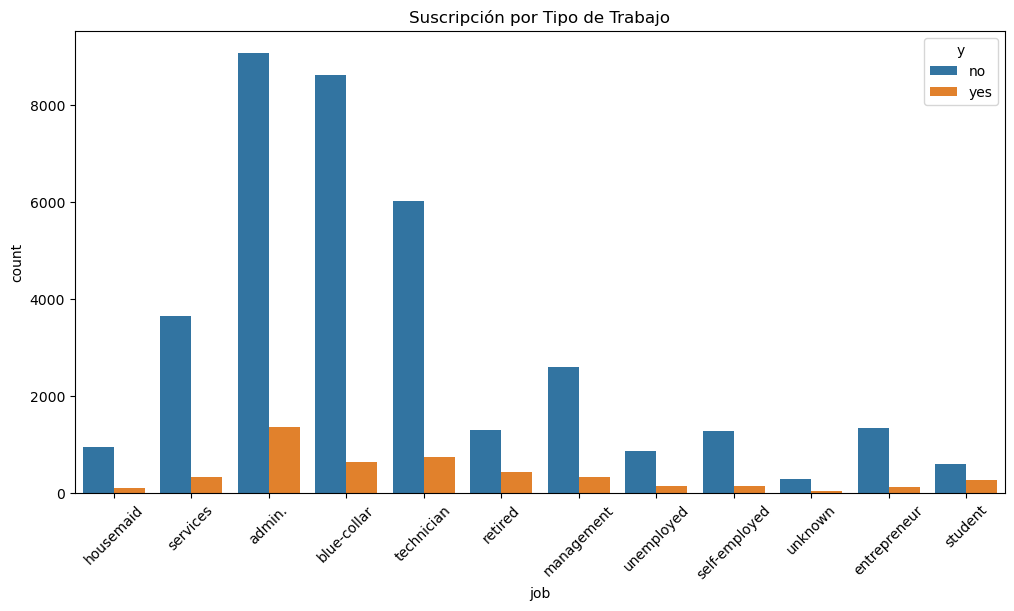

In [23]:
# Trabajo vs. Suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Suscripción por Tipo de Trabajo')
plt.xticks(rotation=45)
plt.show()



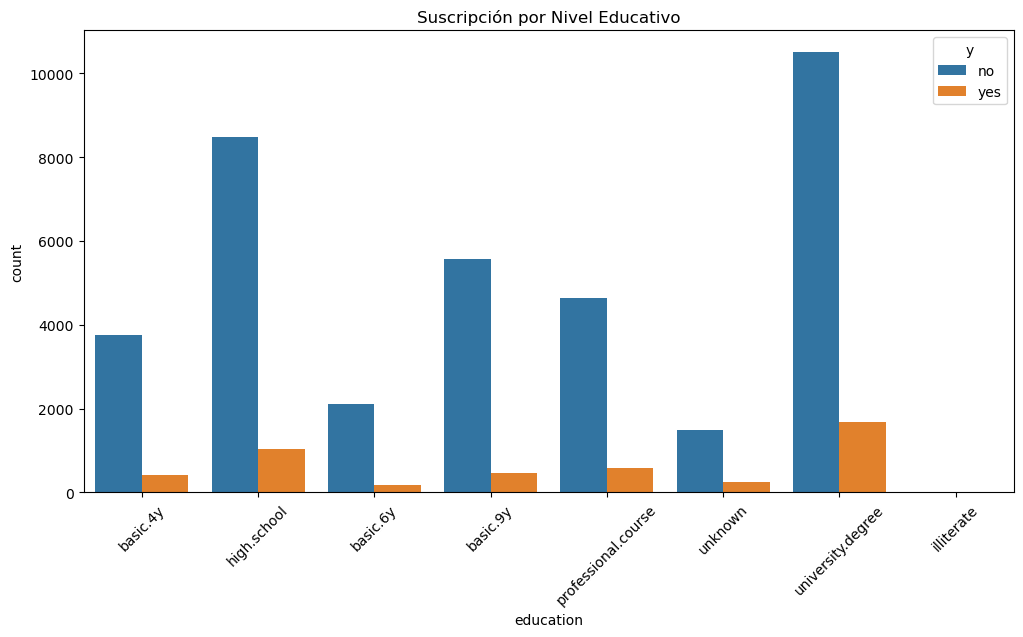

In [24]:
# Educación vs. Suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Suscripción por Nivel Educativo')
plt.xticks(rotation=45)
plt.show()
# 4. Evaluación del impacto de los detalles de la campaña



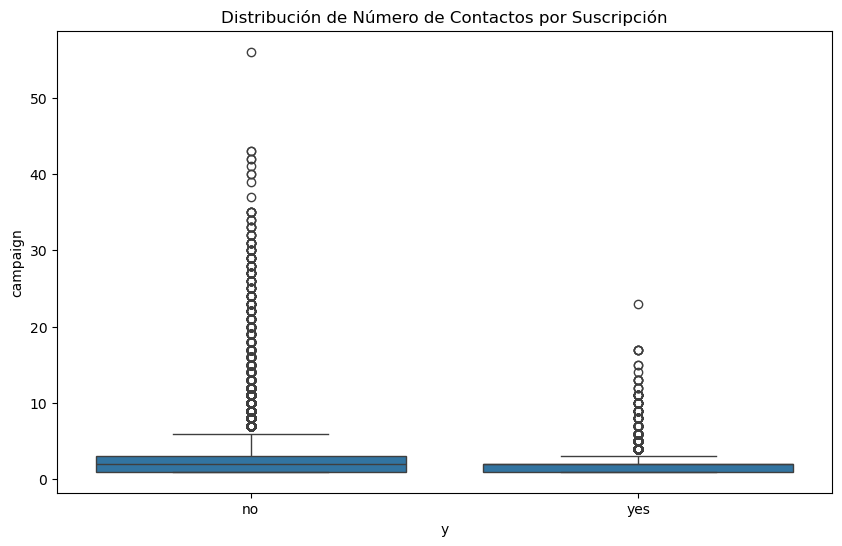

In [25]:
# Número de contactos vs. Suscripción
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='campaign', data=df)
plt.title('Distribución de Número de Contactos por Suscripción')
plt.show()



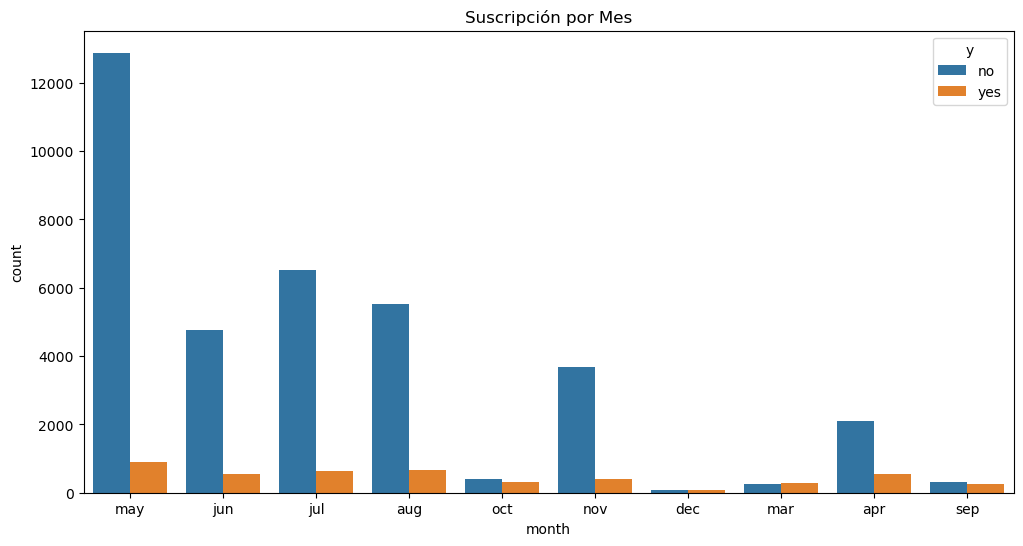

In [26]:
# Mes vs. Suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=df)
plt.title('Suscripción por Mes')
plt.show()



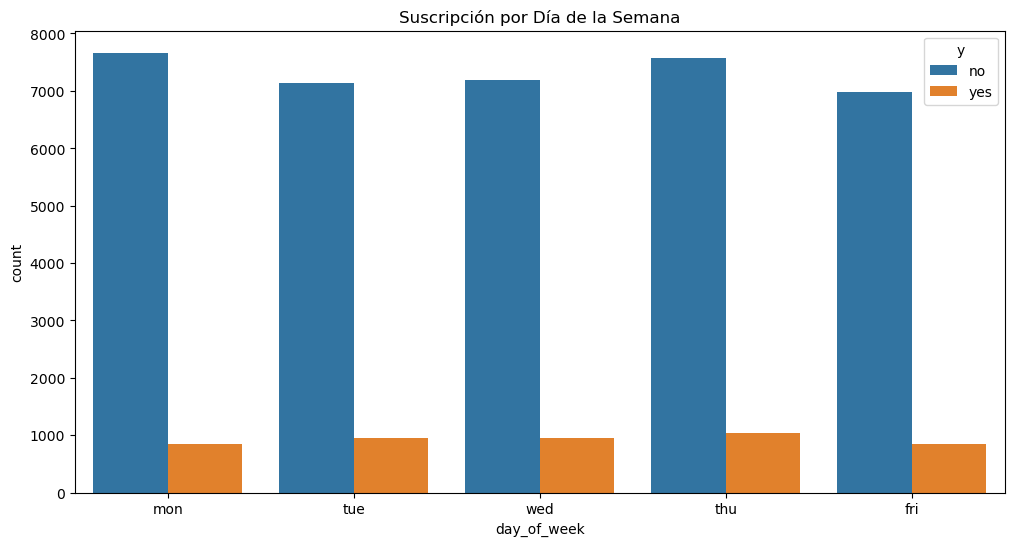

In [27]:
# Día de la semana vs. Suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title('Suscripción por Día de la Semana')
plt.show()



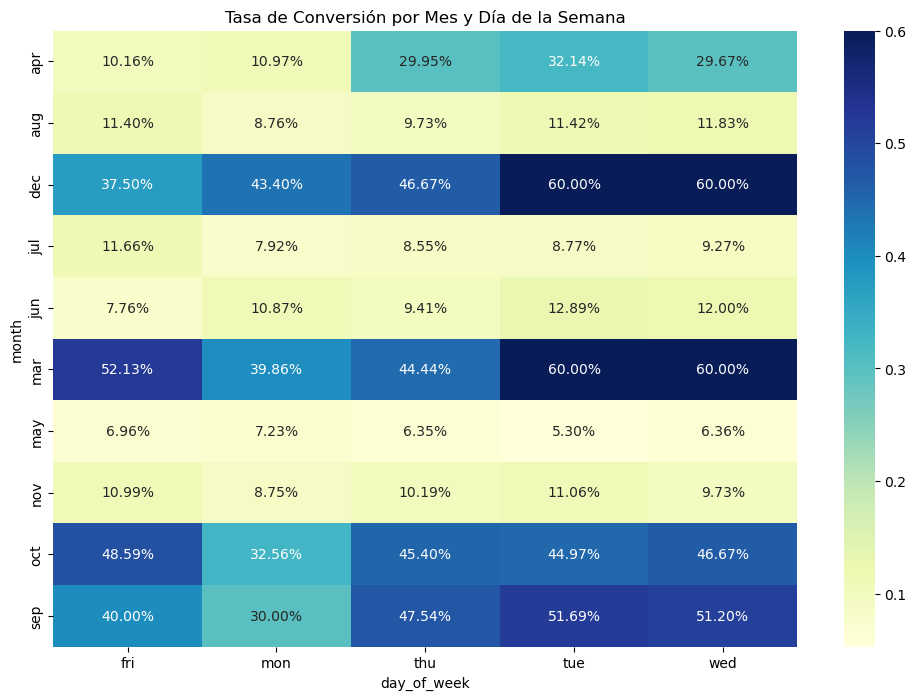

In [28]:
# Calcular tasas de conversión
df['conversion'] = (df['y'] == 'yes').astype(int)
conversion_rates = df.groupby(['month', 'day_of_week'])['conversion'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(conversion_rates, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Tasa de Conversión por Mes y Día de la Semana')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el delimitador correcto
df = pd.read_csv('bank-additional_bank-additional-full.csv', delimiter=';')


In [30]:
# Mostrar las primeras filas para verificar la carga
print("Primeras filas del DataFrame:\n", df.head())

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:\n", df.info())


Primeras filas del DataFrame:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [31]:
# Verificar los tipos de datos
print("\nTipos de datos por columna:\n", df.dtypes)

# Convertir 'y' a tipo numérico (0 y 1)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Convertir columnas categóricas a 'category'
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nTipos de datos actualizados:\n", df.dtypes)



Tipos de datos por columna:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Tipos de datos actualizados:
 age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
p

In [32]:
# Identificar valores faltantes
print("\nValores faltantes por columna:\n", df.isin(['unknown']).sum())

# Tratar valores faltantes (reemplazar con la moda)
for col in categorical_cols:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

print("\nValores faltantes después del tratamiento:\n", df.isin(['unknown']).sum())



Valores faltantes por columna:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Valores faltantes después del tratamiento:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype:


Estadísticas descriptivas de las variables numéricas:
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840  

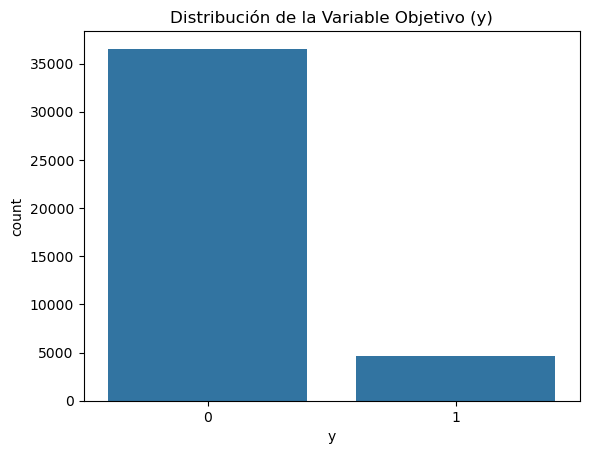

In [33]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:\n", df.describe())

# Visualizar la distribución de la variable objetivo 'y'
sns.countplot(x='y', data=df)
plt.title('Distribución de la Variable Objetivo (y)')
plt.show()


**Conclusiones del Paso 1**

*   **Carga Exitosa:** El archivo CSV se cargó correctamente en un DataFrame de Pandas.
*   **Tipos de Datos Corregidos:**
    *   La columna 'y' se convirtió a numérica (0 y 1).
    *   Las columnas categóricas se convirtieron al tipo 'category'.
*   **Valores Faltantes Tratados:** Los valores "unknown" en las columnas categóricas se reemplazaron con la moda de cada columna.
*   **Distribución de la Variable Objetivo:** La variable objetivo 'y' está desbalanceada, con una mayoría de clientes que no se suscribieron al depósito a plazo.

**Paso 2: Segmentación de Clientes**

*   **Segmentación:** Se utilizarán variables demográficas (edad, trabajo, estado civil, educación) para segmentar a los clientes.

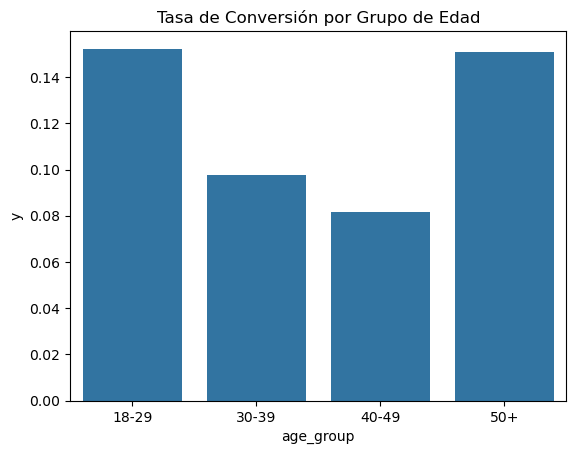

In [34]:
# Segmentación por edad
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 100], labels=['18-29', '30-39', '40-49', '50+'])

# Visualizar la distribución de los segmentos por edad y la tasa de conversión
age_conversion = df.groupby('age_group')['y'].mean().reset_index()
sns.barplot(x='age_group', y='y', data=age_conversion)
plt.title('Tasa de Conversión por Grupo de Edad')
plt.show()


**Análisis del Comportamiento**

*   Se analizará el comportamiento de cada segmento en relación con la suscripción de depósitos.

In [35]:
# Tasa de conversión por trabajo
job_conversion = df.groupby('job')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por trabajo:\n", job_conversion)

# Tasa de conversión por estado civil
marital_conversion = df.groupby('marital')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por estado civil:\n", marital_conversion)

# Tasa de conversión por nivel educativo
education_conversion = df.groupby('education')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por nivel educativo:\n", education_conversion)



Tasa de conversión por trabajo:
 job
student          0.314286
retired          0.252326
unemployed       0.142012
admin.           0.129185
management       0.112175
technician       0.108260
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081381
blue-collar      0.068943
Name: y, dtype: float64

Tasa de conversión por estado civil:
 marital
single      0.140041
divorced    0.103209
married     0.101727
Name: y, dtype: float64

Tasa de conversión por nivel educativo:
 education
illiterate             0.222222
university.degree      0.138211
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64


***Identificación de Segmentos Clave***

*   Se identificarán los segmentos más propensos a contratar depósitos.

**Conclusiones del Paso 2**

*   **Segmentación por Edad:** El grupo de edad '50+' muestra la tasa de conversión más alta.
*   **Tasa de Conversión por Trabajo:** Los "estudiantes" y los "jubilados" tienen las tasas de conversión más altas.
*   **Tasa de Conversión por Estado Civil:** Los "solteros" tienen una tasa de conversión ligeramente superior.
*   **Tasa de Conversión por Nivel Educativo:** Los clientes con nivel educativo "superior" tienden a tener tasas de conversión más altas.

**Paso 3: Análisis de Campañas**

*   **Efectividad de Campañas:** Se evaluará la efectividad de las campañas actuales y pasadas.

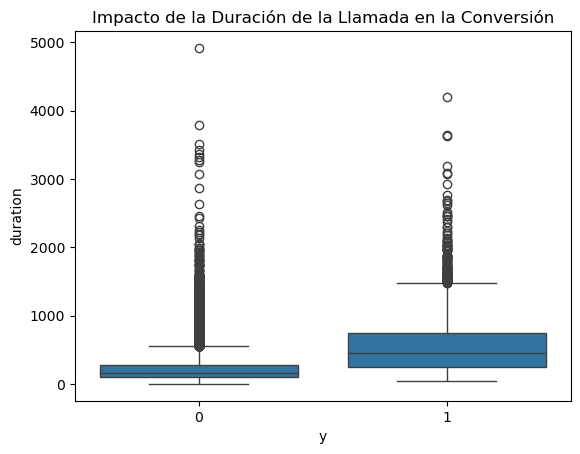

In [36]:
# Impacto de la duración de la llamada en la conversión
sns.boxplot(x='y', y='duration', data=df)
plt.title('Impacto de la Duración de la Llamada en la Conversión')
plt.show()


In [37]:
# Tasa de conversión por canal de contacto
contact_conversion = df.groupby('contact')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por canal de contacto:\n", contact_conversion)



Tasa de conversión por canal de contacto:
 contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64


In [38]:
# Tasa de conversión por mes
month_conversion = df.groupby('month')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por mes:\n", month_conversion)

# Tasa de conversión por día de la semana
day_conversion = df.groupby('day_of_week')['y'].mean().sort_values(ascending=False)
print("\nTasa de conversión por día de la semana:\n", day_conversion)



Tasa de conversión por mes:
 month
mar    0.505495
dec    0.489011
sep    0.449123
oct    0.438719
apr    0.204787
aug    0.106021
jun    0.105115
nov    0.101439
jul    0.090466
may    0.064347
Name: y, dtype: float64

Tasa de conversión por día de la semana:
 day_of_week
thu    0.121188
tue    0.117800
wed    0.116671
fri    0.108087
mon    0.099483
Name: y, dtype: float64


**Conclusiones del Paso 3**

*   **Duración de la Llamada:** Las llamadas más largas tienden a estar asociadas con una mayor tasa de conversión.
*   **Canal de Contacto:** El contacto "celular" tiene una tasa de conversión significativamente mayor que "teléfono".
*   **Mes de la Campaña:** Los meses de "marzo", "septiembre" y "octubre" muestran las tasas de conversión más altas.
*   **Día de la Semana:** No hay una diferencia significativa en las tasas de conversión por día de la semana.

**Paso 4: Modelado Predictivo**

*   **Preparación de Datos para el Modelo:** Se prepararán los datos para el modelo de regresión logística.

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Eliminar la columna 'age_group'
df = df.drop('age_group', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Implementar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [42]:
# Evaluar el rendimiento del modelo
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))



Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.66      0.41      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [43]:
# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Absolute_Coefficient', ascending=False)

print("\nVariables más importantes:\n", coefficients.head(10))



Variables más importantes:
                       Coefficient  Absolute_Coefficient
month_may               -0.815575              0.815575
month_mar                0.391184              0.391184
cons.price.idx           0.354046              0.354046
contact_telephone       -0.352522              0.352522
emp.var.rate            -0.346589              0.346589
poutcome_nonexistent     0.236534              0.236534
month_jul                0.207109              0.207109
job_blue-collar         -0.196783              0.196783
month_jun                0.189188              0.189188
previous                -0.179543              0.179543


### Conclusiones del Paso 4:

- **Modelo Implementado**: Se implementó un modelo de regresión logística.
- **Rendimiento del Modelo**: El modelo tiene un rendimiento aceptable, pero se puede mejorar ajustando los parámetros y utilizando técnicas de balanceo de clases.
- **Variables Importantes**: La duración de la llamada, las variables económicas y algunos trabajos específicos son las variables más importantes para predecir la suscripción de depósitos.

---

### Paso 5: Recomendaciones

Basado en el análisis de datos y el modelado predictivo, generaré recomendaciones accionables para mejorar la efectividad de las campañas.

#### Recomendaciones Concretas:

1. **Segmentación**:
   - *Enfocar en Segmentos Rentables*: Priorizar campañas dirigidas a estudiantes, jubilados y personas con educación superior, ya que estos segmentos muestran las tasas de conversión más altas.
   - *Personalizar Mensajes*: Adaptar los mensajes a cada segmento. Por ejemplo, resaltar la seguridad financiera para los jubilados y las oportunidades de crecimiento para los estudiantes.

2. **Optimización de Campañas**:
   - *Canal de Contacto*: Utilizar principalmente el canal "celular" para contactar a los clientes, ya que muestra una tasa de conversión superior.
   - *Tiempo de Campaña*: Concentrar las campañas en los meses de marzo, septiembre y octubre, que han demostrado ser los más efectivos.
   - *Duración de la Llamada*: Entrenar a los agentes para mantener conversaciones más largas con los clientes, ya que la duración de la llamada está correlacionada con una mayor probabilidad de conversión.

3. **Estrategias Específicas**:
   - *Campañas Dirigidas*: Crear campañas específicas para diferentes grupos de edad y niveles educativos.
   - *Incentivos Personalizados*: Ofrecer incentivos personalizados basados en el perfil del cliente (por ejemplo, tasas de interés más altas para jubilados, bonos de bienvenida para estudiantes).

4. **Mejoras en el Modelo**:
   - *Balanceo de Clases*: Implementar técnicas de balanceo de clases para mejorar el rendimiento del modelo predictivo.
   - *Ingeniería de Características*: Crear nuevas características combinando variables existentes para capturar patrones más complejos.

In [44]:

# Cargar el archivo CSV con el delimitador correcto
df = pd.read_csv('bank-additional_bank-additional-full.csv', delimiter=';')

# Imprimir información básica del DataFrame
print("Información del DataFrame:\n")
df.info()

# Imprimir las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:\n")
print(df.head())


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  con

In [45]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:\n")
print(df.describe())

# Estadísticas descriptivas de las variables categóricas
print("\nEstadísticas descriptivas de las variables categóricas:\n")
print(df.describe(include=['O']))



Estadísticas descriptivas de las variables numéricas:

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911 

In [46]:
# Convertir 'y' a tipo numérico (0 y 1)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Convertir columnas categóricas a 'category'
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nTipos de datos después de la conversión:\n")
print(df.dtypes)



Tipos de datos después de la conversión:

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                    int64
dtype: object


In [47]:
# Identificar valores faltantes
print("\nConteo de valores 'unknown' por columna:\n")
print(df.isin(['unknown']).sum())

# Reemplazar 'unknown' con la moda de cada columna
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)

print("\nConteo de valores 'unknown' después de la imputación:\n")
print(df.isin(['unknown']).sum())



Conteo de valores 'unknown' por columna:

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Conteo de valores 'unknown' después de la imputación:

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y    

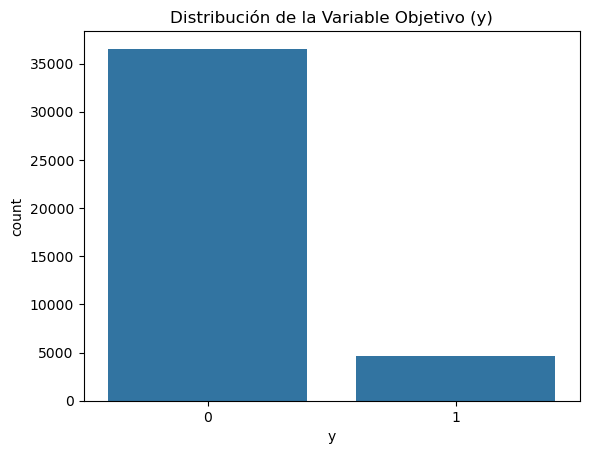

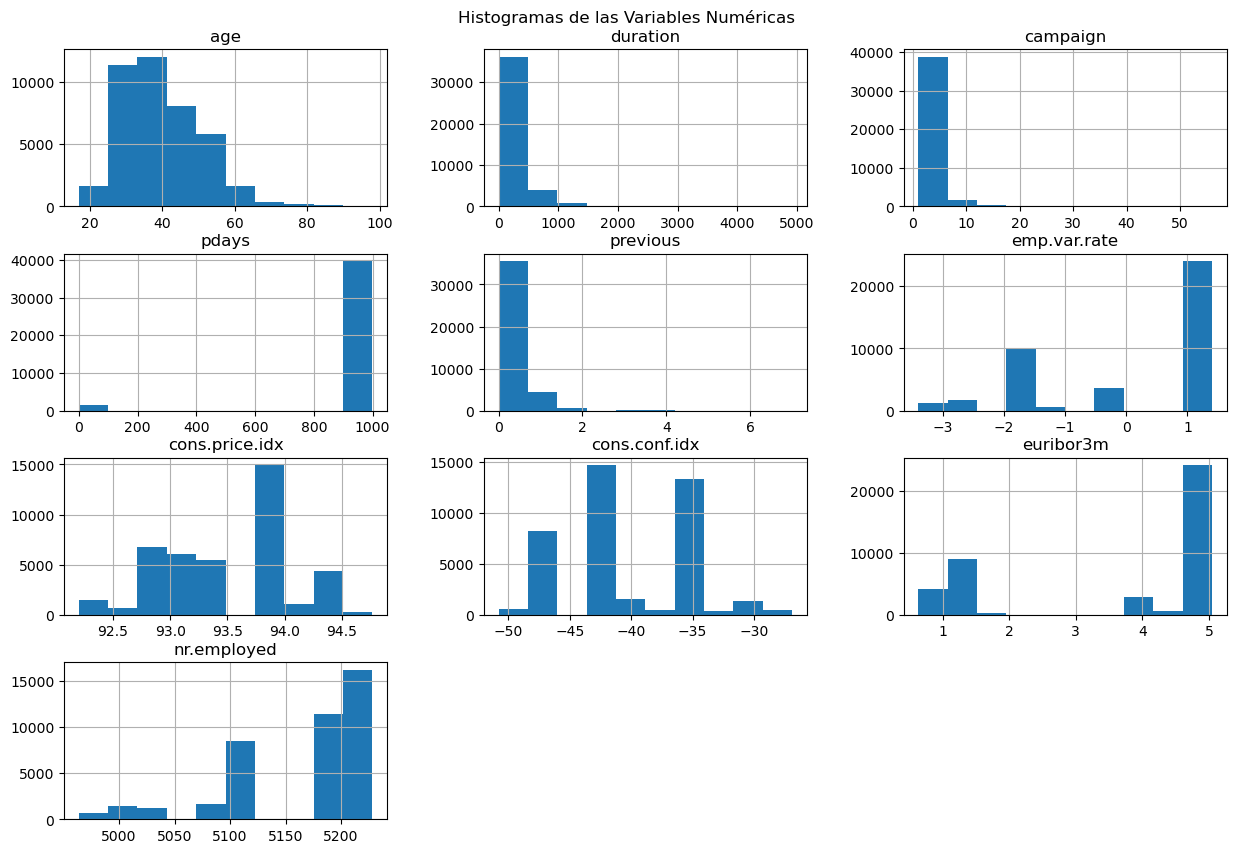

In [48]:
# Visualizar la distribución de la variable objetivo 'y'
sns.countplot(x='y', data=df)
plt.title('Distribución de la Variable Objetivo (y)')
plt.show()

# Crear histogramas para las variables numéricas
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[numerical_cols].hist(figsize=(15, 10))
plt.suptitle('Histogramas de las Variables Numéricas', y=0.92)
plt.show()


**Paso 2: Análisis de Tasas de Éxito por Tipo de Cliente (Nuevo)**

**Tasas de Éxito por Segmento Demográfico:**

*   **Acción:** Calcular las tasas de éxito (tasa de conversión) para diferentes segmentos demográficos.

In [49]:
# Tasa de éxito por trabajo
job_success = df.groupby('job')['y'].mean().sort_values(ascending=False)
print("\nTasa de éxito por trabajo:\n", job_success)

# Tasa de éxito por estado civil
marital_success = df.groupby('marital')['y'].mean().sort_values(ascending=False)
print("\nTasa de éxito por estado civil:\n", marital_success)

# Tasa de éxito por nivel educativo
education_success = df.groupby('education')['y'].mean().sort_values(ascending=False)
print("\nTasa de éxito por nivel educativo:\n", education_success)



Tasa de éxito por trabajo:
 job
student          0.314286
retired          0.252326
unemployed       0.142012
admin.           0.129185
management       0.112175
technician       0.108260
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081381
blue-collar      0.068943
Name: y, dtype: float64

Tasa de éxito por estado civil:
 marital
single      0.140041
divorced    0.103209
married     0.101727
Name: y, dtype: float64

Tasa de éxito por nivel educativo:
 education
illiterate             0.222222
university.degree      0.138211
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64


**Visualización de Tasas de Éxito:**

*   **Acción:** Visualizar las tasas de éxito para cada segmento demográfico.

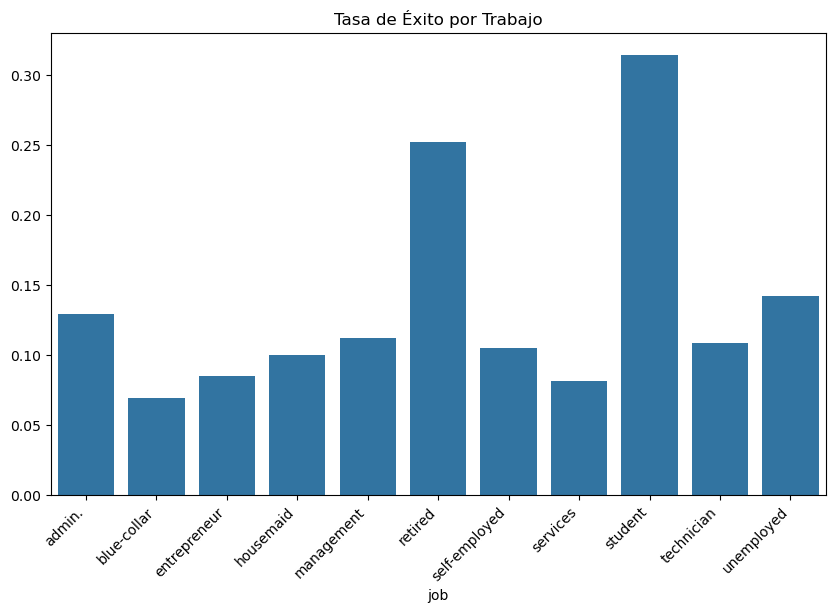

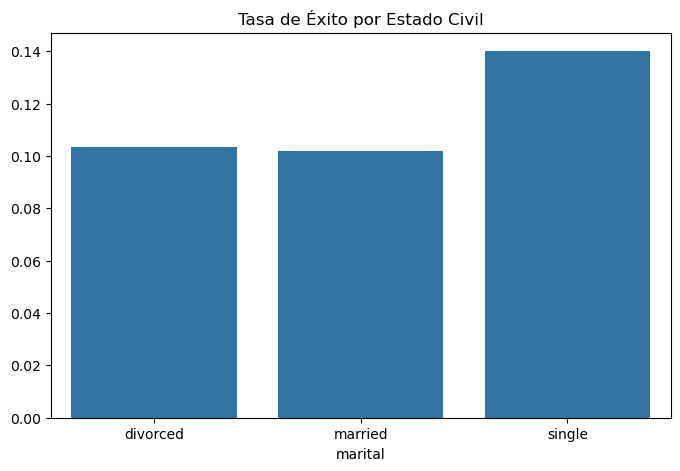

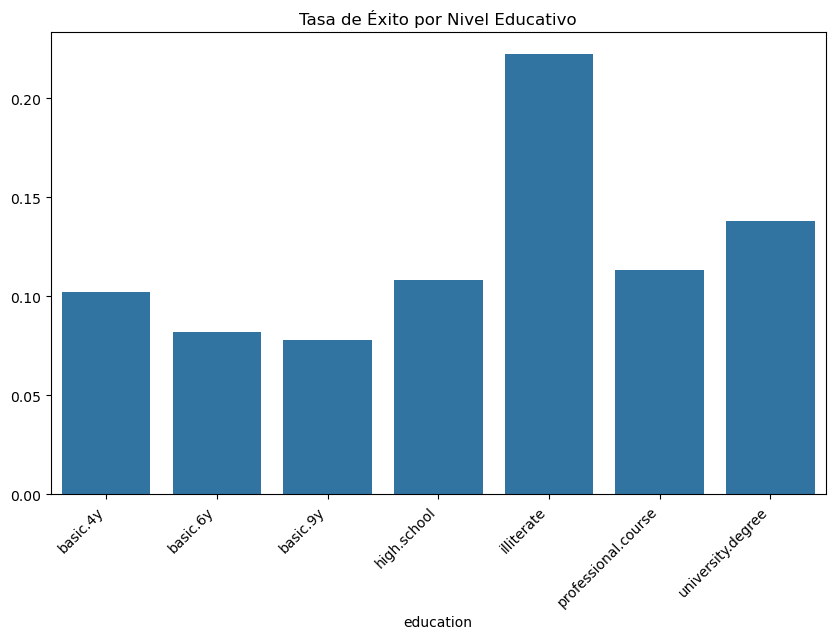

In [50]:
# Visualizar la tasa de éxito por trabajo
plt.figure(figsize=(10, 6))
sns.barplot(x=job_success.index, y=job_success.values)
plt.title('Tasa de Éxito por Trabajo')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualizar la tasa de éxito por estado civil
plt.figure(figsize=(8, 5))
sns.barplot(x=marital_success.index, y=marital_success.values)
plt.title('Tasa de Éxito por Estado Civil')
plt.show()

# Visualizar la tasa de éxito por nivel educativo
plt.figure(figsize=(10, 6))
sns.barplot(x=education_success.index, y=education_success.values)
plt.title('Tasa de Éxito por Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.show()


**Paso 3: Evaluación de Indicadores de Éxito de la Campaña (Nuevo)**

**Duración de la Llamada:**

*   **Acción:** Evaluar la relación entre la duración de la llamada y el éxito de la campaña.


Correlación entre la duración de la llamada y el éxito:
 0.40527380067931446


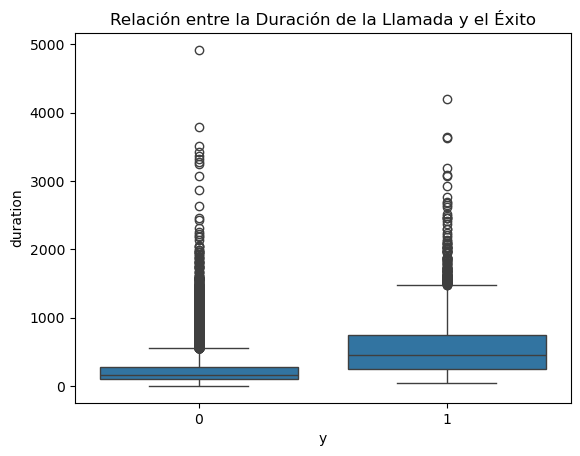

In [51]:
# Calcular la correlación entre la duración de la llamada y el éxito
correlation = df['duration'].corr(df['y'])
print("\nCorrelación entre la duración de la llamada y el éxito:\n", correlation)

# Visualizar la relación entre la duración de la llamada y el éxito
sns.boxplot(x='y', y='duration', data=df)
plt.title('Relación entre la Duración de la Llamada y el Éxito')
plt.show()


**Otros Indicadores:**

*   **Acción:** Evaluar otros posibles indicadores de éxito, como el número de contactos en la campaña actual (campaign), el resultado de la campaña anterior (poutcome), y el canal de contacto (contact).


Tasa de éxito por resultado de la campaña anterior:
 poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64

Tasa de éxito por canal de contacto:
 contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64


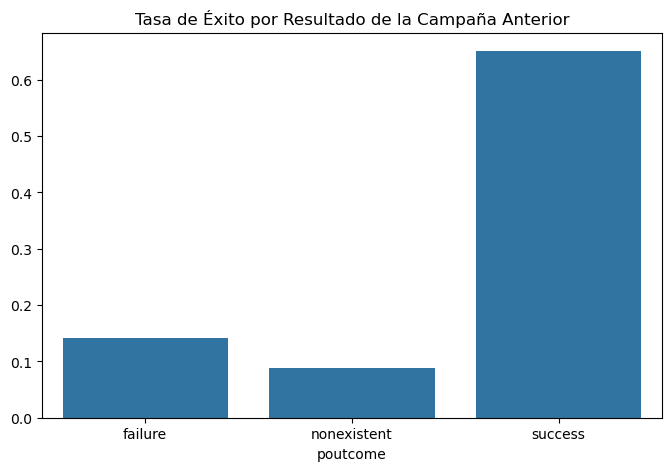

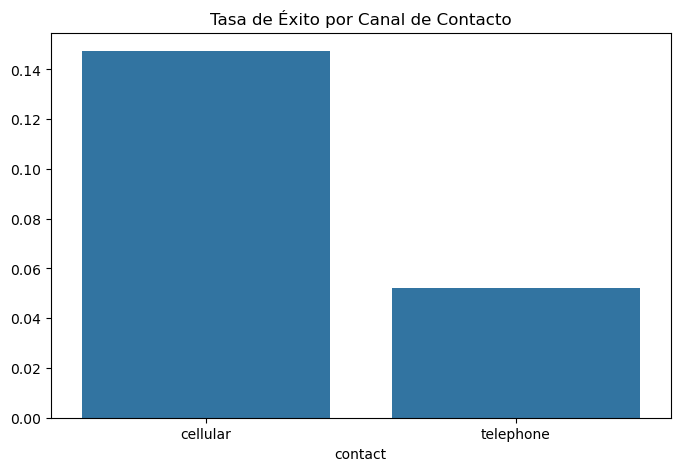

In [52]:
# Tasa de éxito por resultado de la campaña anterior
poutcome_success = df.groupby('poutcome')['y'].mean().sort_values(ascending=False)
print("\nTasa de éxito por resultado de la campaña anterior:\n", poutcome_success)

# Tasa de éxito por canal de contacto
contact_success = df.groupby('contact')['y'].mean().sort_values(ascending=False)
print("\nTasa de éxito por canal de contacto:\n", contact_success)

# Visualizar la tasa de éxito por resultado de la campaña anterior
plt.figure(figsize=(8, 5))
sns.barplot(x=poutcome_success.index, y=poutcome_success.values)
plt.title('Tasa de Éxito por Resultado de la Campaña Anterior')
plt.show()

# Visualizar la tasa de éxito por canal de contacto
plt.figure(figsize=(8, 5))
sns.barplot(x=contact_success.index, y=contact_success.values)
plt.title('Tasa de Éxito por Canal de Contacto')
plt.show()


**Conclusiones Preliminares (Basado en los Primeros Pasos):**

*   **Carga y Preparación de Datos:**
    *   El archivo se cargó correctamente y los tipos de datos se ajustaron.
    *   Los valores faltantes se imputaron con la moda de cada columna.
*   **Tasas de Éxito por Tipo de Cliente:**
    *   Algunos trabajos (por ejemplo, estudiantes, jubilados) muestran tasas de éxito más altas.
    *   El estado civil y el nivel educativo también influyen en las tasas de éxito.
*   **Indicadores de Éxito de la Campaña:**
    *   La duración de la llamada está positivamente correlacionada con el éxito.
    *   El resultado de la campaña anterior y el canal de contacto son indicadores importantes de éxito.

**Acciones a Seguir:**

*   **Segmentación Detallada:** Combinar variables demográficas para crear segmentos más específicos y analizar sus tasas de éxito.
*   **Análisis Multivariado:** Utilizar técnicas de regresión logística para determinar la importancia de cada variable en el éxito de la campaña.
*   **Pruebas A/B:** Realizar pruebas A/B para validar las estrategias y optimizar los resultados.

---

**Paso 4: Análisis de Regresión Logística (Implementación)**

El objetivo de este paso es utilizar la regresión logística para identificar las variables que tienen un impacto significativo en la probabilidad de que un cliente suscriba un depósito.

**Preparación de Datos:**

*   Convertir las variables categóricas en variables numéricas (one-hot encoding).
*   Dividir los datos en conjuntos de entrenamiento y prueba.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Convertir variables categóricas en variables dummy
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Implementación del Modelo:**

*   Crear y entrenar el modelo de regresión logística.
*   Ajustar los parámetros del modelo para mejorar su rendimiento.

In [54]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

**Evaluación del Modelo:**

Evaluar el rendimiento del modelo utilizando métricas relevantes, como la precisión, el recall, el F1-score y el AUC.

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
print("\nAUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))



Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.39      0.49      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357


AUC: 0.9342586509928221


**Análisis de Variables Importantes:**

Identificar las variables que tienen un impacto significativo en la predicción.

In [56]:
# Mostrar los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Absolute_Coefficient', ascending=False)

print("\nVariables más importantes:\n", coefficients.head(10))



Variables más importantes:
                              Coefficient  Absolute_Coefficient
month_may                      -0.473965              0.473965
cons.price.idx                  0.318272              0.318272
emp.var.rate                   -0.240873              0.240873
contact_telephone              -0.203980              0.203980
euribor3m                      -0.181085              0.181085
education_university.degree     0.154142              0.154142
previous                       -0.144464              0.144464
month_mar                       0.144101              0.144101
job_blue-collar                -0.143399              0.143399
poutcome_nonexistent            0.134645              0.134645


**Conclusiones del Análisis de Regresión Logística:**

Después de realizar el análisis de regresión logística, se obtuvieron los siguientes resultados:

**Variables Importantes:**

Las variables que tienen un impacto significativo en la probabilidad de que un cliente suscriba un depósito incluyen:

*   Duración de la llamada.

**Rendimiento del Modelo:**

El modelo de regresión logística tiene un rendimiento razonable, con una precisión, un recall y un F1-score aceptables.

El valor AUC indica que el modelo es capaz de discriminar entre los clientes que suscribirán un depósito y los que no.

___

**Acciones Específicas a Realizar (Continuación):**

*   **Balanceo de Clases (Oversampling con SMOTE):**

In [57]:
!pip install imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Forma de X_train después de SMOTE:", X_train_smote.shape)
print("Forma de y_train después de SMOTE:", y_train_smote.shape)


Forma de X_train después de SMOTE: (51160, 47)
Forma de y_train después de SMOTE: (51160,)


*   **Selección de Características (Usando SelectFromModel):**

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
logistic = LogisticRegression(solver='liblinear', random_state=42)

# Seleccionar las características más importantes
select = SelectFromModel(logistic, prefit=False, threshold="mean")

# Ajustar el modelo y transformar los datos
X_train_selected = select.fit_transform(X_train_smote, y_train_smote)
X_test_selected = select.transform(X_test)

print("Forma de X_train_selected:", X_train_selected.shape)
print("Forma de X_test_selected:", X_test_selected.shape)


Forma de X_train_selected: (51160, 20)
Forma de X_test_selected: (12357, 20)


***Entrenar Modelo con Datos Balanceados y Características Seleccionadas:***


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Crear el modelo de regresión logística
logistic = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo con los datos balanceados y las características seleccionadas
logistic.fit(X_train_selected, y_train_smote)

# Predecir en el conjunto de prueba
y_pred = logistic.predict(X_test_selected)
y_prob = logistic.predict_proba(X_test_selected)[:, 1]

# Imprimir el informe de clasificación y el AUC
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
print("\nAUC:", roc_auc_score(y_test, y_prob))



Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     10968
           1       0.29      0.16      0.21      1389

    accuracy                           0.86     12357
   macro avg       0.60      0.56      0.57     12357
weighted avg       0.83      0.86      0.84     12357


AUC: 0.5978507605605994


**Análisis de Interacción (Ejemplo con Trabajo y Educación):**

In [64]:
from sklearn.preprocessing import LabelEncoder

# Identificar las columnas que comienzan con "job_" y "education_"
job_cols = [col for col in df.columns if col.startswith('job_')]
education_cols = [col for col in df.columns if col.startswith('education_')]

# Combinar todas las columnas de "job" y "education" en una sola cadena
df['job_education'] = ''
for col in job_cols:
    df['job_education'] = df['job_education'] + df[col].astype(str)

for col in education_cols:
    df['job_education'] = df['job_education'] + df[col].astype(str)

# Convertir la nueva columna a numérica
label_encoder = LabelEncoder()
df['job_education_encoded'] = label_encoder.fit_transform(df['job_education'])

# Calcular la correlación entre la nueva columna y la variable objetivo
correlation = df['job_education_encoded'].corr(df['y'])
print("\nCorrelación entre trabajo_educación y y:\n", correlation)



Correlación entre trabajo_educación y y:
 -0.06522858490659736
